In [3]:
#Hierarchical Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import pandas as pd 
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
d = pd.read_csv("Desktop/Fifa18.csv", sep=",",encoding = "ISO-8859-1")

#Agglomerative — Bottom up approach. Start with many small clusters and merge them together to create bigger clusters.

/Users/selinkucukoglu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
#Data cleaning
d =d.drop(['Name', 'Photo','Flag', 'Club', 'Club Logo', ], axis=1)

#removing the non-numerical columns to obtain a cleaner data

In [7]:
#Filling missing values with the mean values
d.fillna(d.mean(), inplace=True)
d.head()

,Unnamed: 0,Age,Nationality,Overall,Potential,Value,Wage,Special,Acceleration,Aggression,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,32,Portugal,94,94,âÂ95.5M,âÂ565K,2228,89,63,...,61.000000,53.000000,82.000000,62.000000,91.000000,89.000000,92.00000,91.000000,66.000000,92.00000
1,1,30,Argentina,93,93,âÂ105M,âÂ565K,2154,92,48,...,57.000000,45.000000,84.000000,59.000000,92.000000,90.000000,88.00000,91.000000,62.000000,88.00000
2,2,25,Brazil,92,94,âÂ123M,âÂ280K,2100,94,56,...,59.000000,46.000000,79.000000,59.000000,88.000000,87.000000,84.00000,89.000000,64.000000,84.00000
3,3,30,Uruguay,92,92,âÂ97M,âÂ510K,2291,88,78,...,64.000000,58.000000,80.000000,65.000000,88.000000,85.000000,88.00000,87.000000,68.000000,88.00000
4,4,31,Germany,92,92,âÂ61M,âÂ230K,1493,58,29,...,56.979689,55.550464,58.506833,56.865283,59.030028,60.057736,58.20405,59.359265,57.698721,58.20405


In [14]:
d.head()

,Unnamed: 0,Age,Nationality,Overall,Potential,Special,Acceleration,Aggression,Agility,Balance,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,32,Portugal,94,94,2228,89,63,89,63,...,61.000000,53.000000,82.000000,62.000000,91.000000,89.000000,92.00000,91.000000,66.000000,92.00000
1,1,30,Argentina,93,93,2154,92,48,90,95,...,57.000000,45.000000,84.000000,59.000000,92.000000,90.000000,88.00000,91.000000,62.000000,88.00000
2,2,25,Brazil,92,94,2100,94,56,96,82,...,59.000000,46.000000,79.000000,59.000000,88.000000,87.000000,84.00000,89.000000,64.000000,84.00000
3,3,30,Uruguay,92,92,2291,88,78,86,60,...,64.000000,58.000000,80.000000,65.000000,88.000000,85.000000,88.00000,87.000000,68.000000,88.00000
4,4,31,Germany,92,92,1493,58,29,52,35,...,56.979689,55.550464,58.506833,56.865283,59.030028,60.057736,58.20405,59.359265,57.698721,58.20405


In [8]:
#Checking if there are any missing values
d.isnull().values.any()

False

In [9]:
d =d.drop(['Value', 'Wage'], axis=1)

In [15]:
X = d.iloc[:, [4, 5]].values

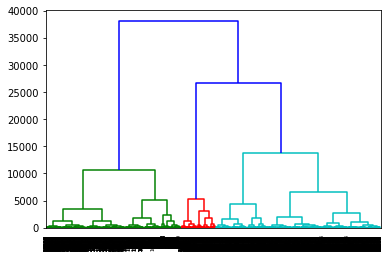

In [16]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

#drawing a dendrogram to find the highest vertical distance that doesn’t intersect with any clusters to find the optimal number of clusters which is 3 in this case

In [19]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_

#create an instance of AgglomerativeClustering using the euclidean distance as the measure of distance between points and ward linkage to calculate the proximity of clusters (Towards Data Science)

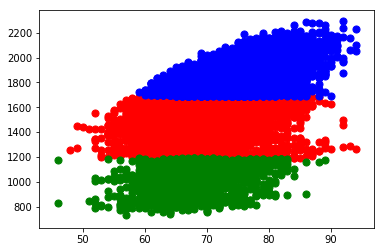

In [20]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.show()

#plotting the different clusters, in blue, green and red